## 1- Setup

In [1]:
!pip install split-folders matplotlib opencv-python spicy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import random
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

Mounted at /content/drive


## 2- Keras data generator

In [3]:
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

In [4]:
datagen = ImageDataGenerator()

In [5]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 13173 images belonging to 6 classes.


In [6]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/validation", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 3010 images belonging to 6 classes.


In [7]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 861 images belonging to 6 classes.


## 3- load the model

In [8]:
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [9]:
x = pre_trained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(6, activation=tf.nn.softmax)(x)

model = Model(pre_trained_model.input, x)

In [10]:
# define training function
def trainModel(model, epochs, optimizer, batch_size):
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

# 4- train the model

In [11]:
model_history = trainModel(model = model, epochs = 20, optimizer = "Adam", batch_size = 32)

Epoch 1/20
412/412 [==============================] - 3197s 8s/step - loss: 0.5920 - accuracy: 0.7943 - val_loss: 2.9661 - val_accuracy: 0.5625
Epoch 2/20
412/412 [==============================] - 109s 264ms/step - loss: 0.4015 - accuracy: 0.8652 - val_loss: 0.5074 - val_accuracy: 0.8369
Epoch 3/20
412/412 [==============================] - 109s 264ms/step - loss: 0.3583 - accuracy: 0.8807 - val_loss: 0.4303 - val_accuracy: 0.8522
Epoch 4/20
412/412 [==============================] - 110s 267ms/step - loss: 0.3213 - accuracy: 0.8892 - val_loss: 0.8763 - val_accuracy: 0.7429
Epoch 5/20
412/412 [==============================] - 109s 265ms/step - loss: 0.3013 - accuracy: 0.9027 - val_loss: 0.4464 - val_accuracy: 0.8571
Epoch 6/20
412/412 [==============================] - 109s 265ms/step - loss: 0.2662 - accuracy: 0.9082 - val_loss: 0.4716 - val_accuracy: 0.8402
Epoch 7/20
412/412 [==============================] - 109s 265ms/step - loss: 0.2710 - accuracy: 0.9067 - val_loss: 0.4953 - v

5- evaluate the model

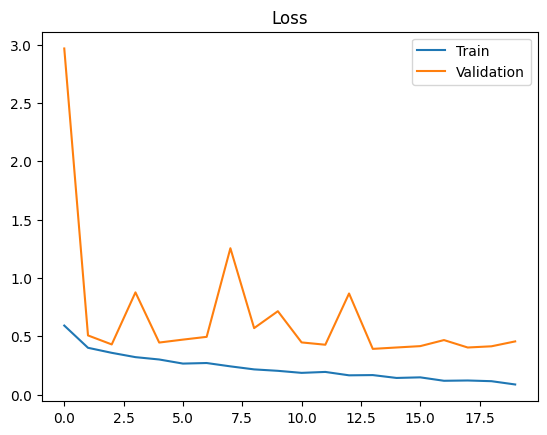

In [12]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

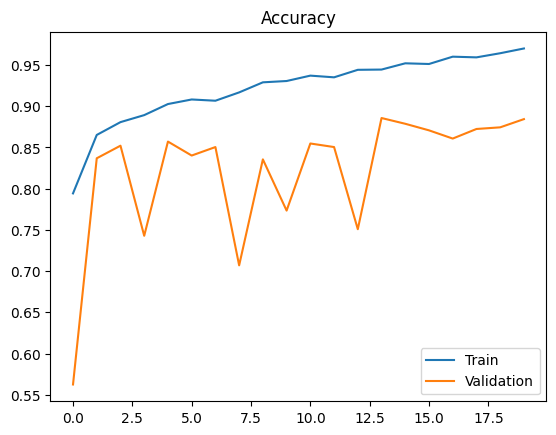

In [13]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

27/27 [==============================] - 186s 7s/step - loss: 0.4829 - accuracy: 0.8746
The test loss is:  0.48294034600257874
The best accuracy is:  87.45644688606262


6- save the model

In [16]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Image classification/models/INCEPTIONV3/INCEPTIONV3_Classifier.json", "w") as json_file:json_file.write(model_json)

model.save("/content/drive/MyDrive/Image classification/INCEPTIONV3/INCEPTIONV3_Classifier.h5")
print("Saved model to disk")

model.save_weights("/content/drive/MyDrive/Image classification/models/INCEPTIONV3/INCEPTIONV3_weights.h5")

Saved model to disk


7- test data

In [17]:
test_dir = '/content/drive/MyDrive/Image classification/dataset/test'
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32, directory=test_dir,
target_size=(224, 224), class_mode='categorical')

Found 861 images belonging to 6 classes.


1/1 [==============================] - 0s 44ms/step


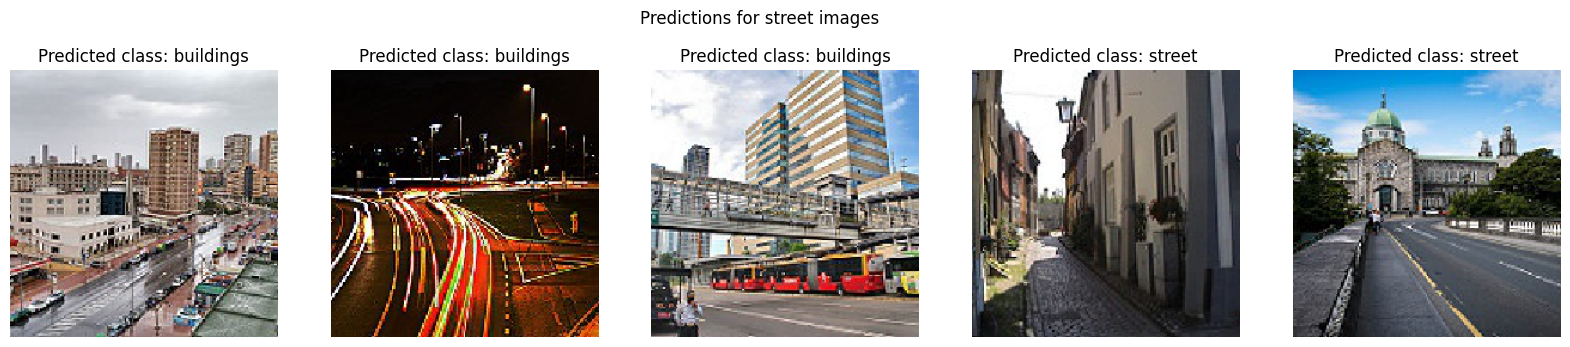

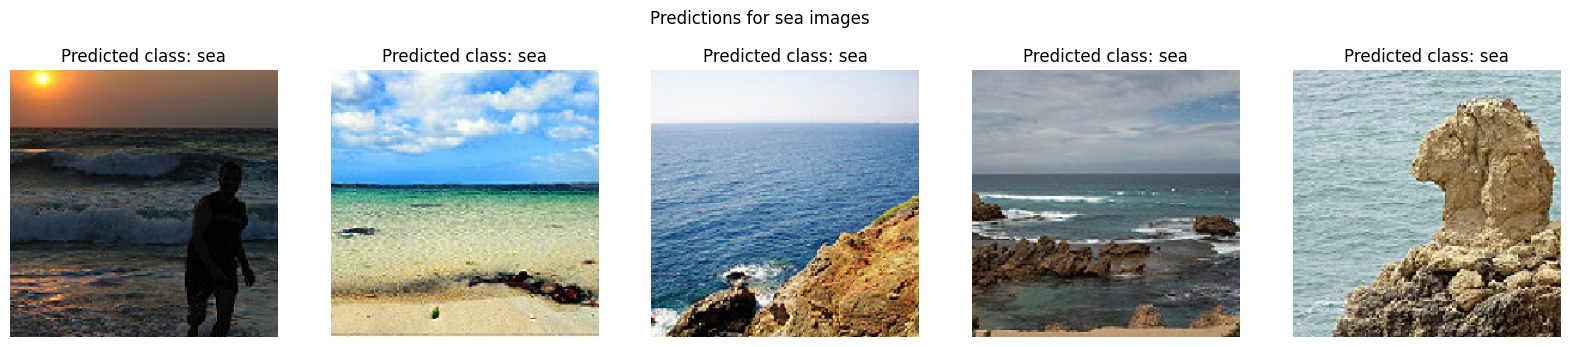

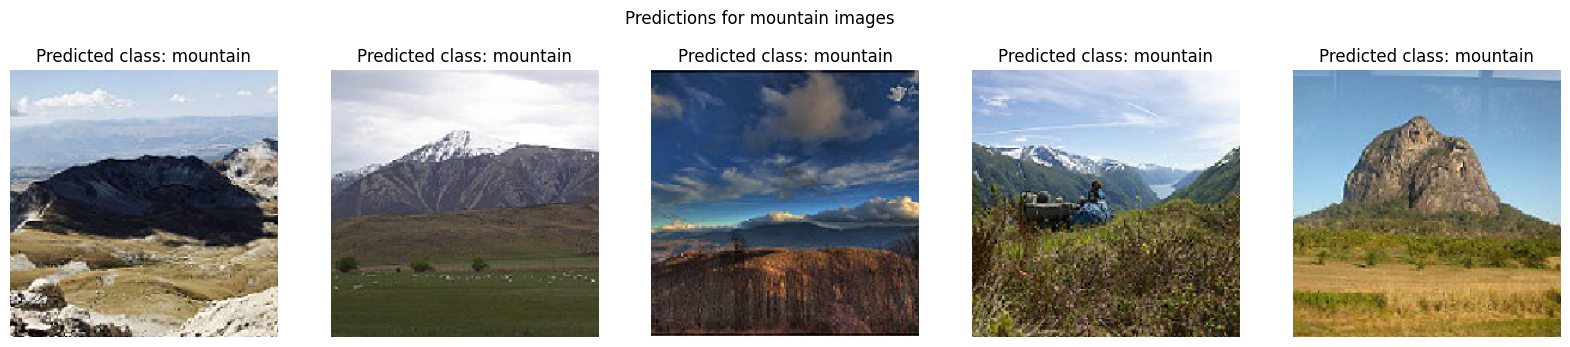

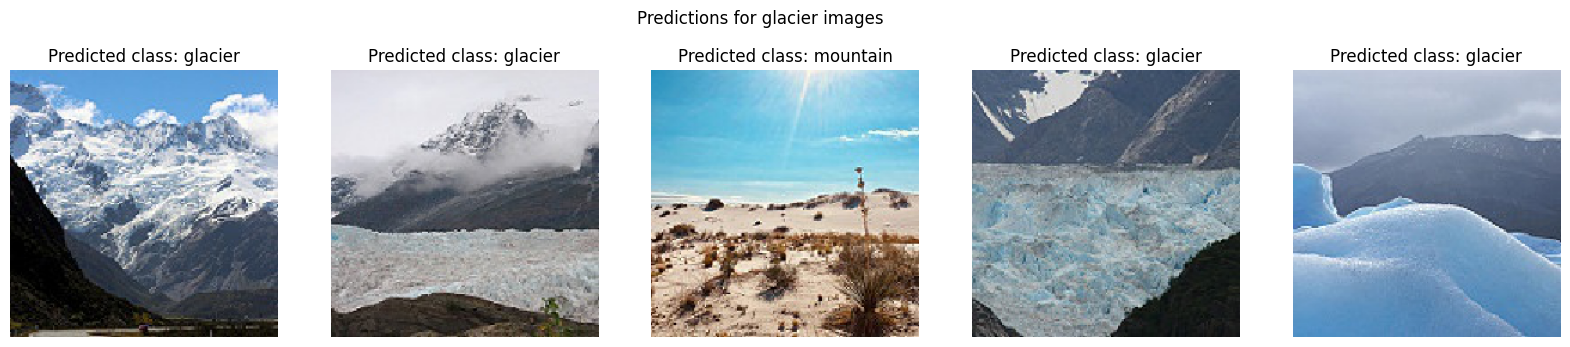

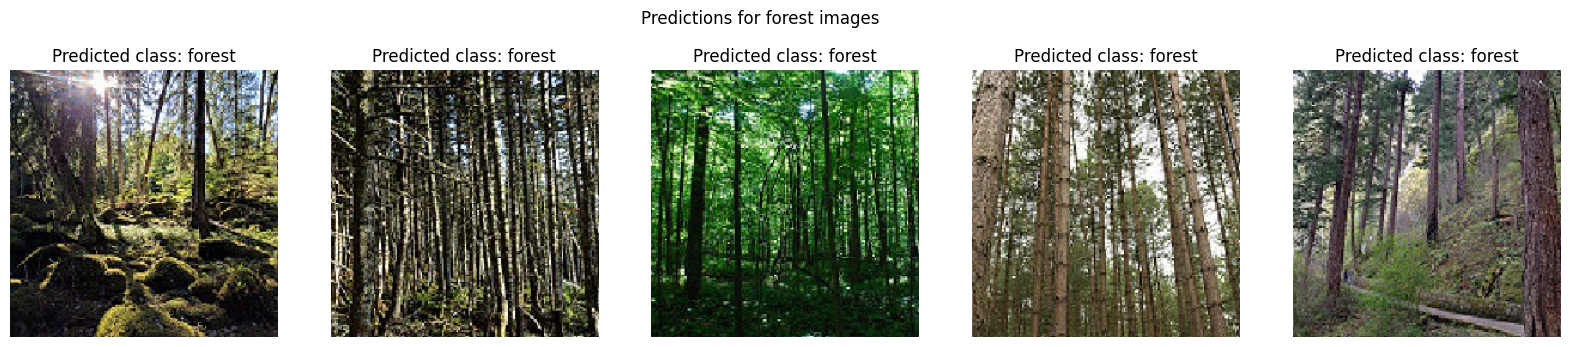

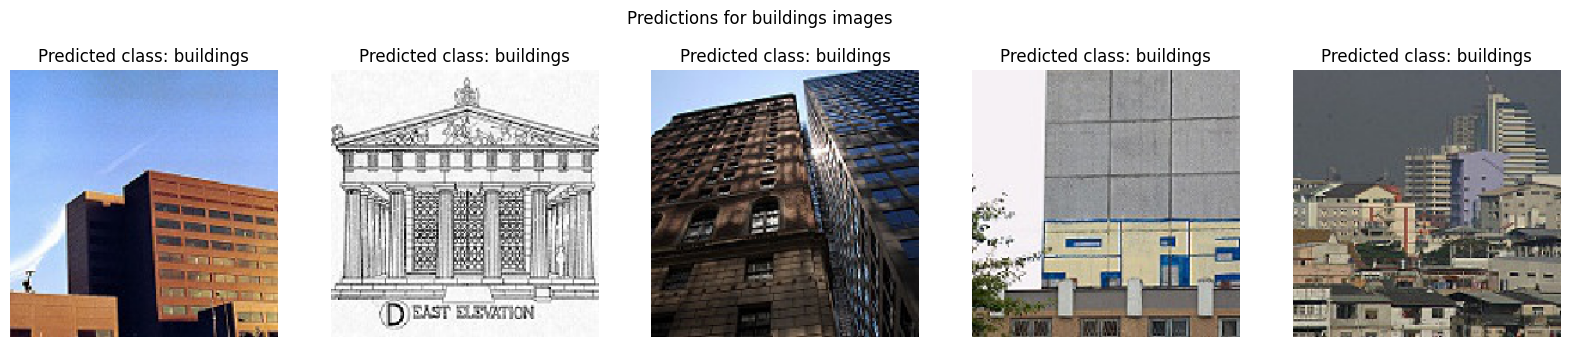

In [18]:
# define classes name
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

# initialize a list to store the predictions
predictions_list = []

# loop over each class folder
for class_name in class_names:

    # set the path to the current class folder
    class_dir = os.path.join(test_dir, class_name)

    # initialize a list to store the image paths
    image_paths = []

    # loop over the first 5 images in the current class folder
    image_names = random.sample(os.listdir(class_dir), k=5)
    image_paths = [os.path.join(class_dir, img) for img in image_names]

    # load the images and convert them to numpy arrays
    images = []
    for image_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    images = np.array(images)

    # generate predictions for the images
    predictions = model.predict(images)

    # generate argmax for predictions
    class_ids = np.argmax(predictions, axis=1)

    # transform classes number into classes name
    predicted_classes = [class_names[class_id] for class_id in class_ids]

    # store the predictions
    predictions_list.append((class_name, image_paths, predicted_classes))

# plot the predictions
for class_name, image_paths, predicted_classes in predictions_list:
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'Predictions for {class_name} images')
    for i, image_path in enumerate(image_paths):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Predicted class: {predicted_classes[i]}')
    plt.show()